# Group 7 Project: Latent Space Cluster Analysis
<i>Patrick Kay, Kyle Shannon, Ean Vandergraaf</i>

<b>Suggested Activities for Analysis:</b>
* Get a feel for the data by looking at specific frames and the closest other points.
* Clean your data, perhaps moving the beginning and end content of credits.
* Develop hunches and hypotheses about different characters, visual themes, etc.
* Watch or rewatch the movie and/or scour the internet for critical analysis to develop theories.
* Use clustering techniques, such as k-means, to break up scenes or themes
* Develop algorithms or methods for breaking things down scene by scene.
* Consider aggregating scenes as averages.
* Reduce the number of dimensions to explore relationships among.
* Plot timelines that have additional analysis or selective content.
* Interpret the data and analysis through group discussions.

  
<b>Goal to answering these questions:</b>
* <b>Questions about characters</b>: Who are the main characters? When are they featured or absent?
* <b>Semantic themes and motifs</b>: Are there broader themes you can find that repeat across scenes?
* <b>Outliers</b>: Are there scenes that differ greatly compared to most of the rest of the film?
* <b>Clusters</b>: How would you characterize the visual content of the film? Answering this question will likely require both clustering (e.g., k-means, t-SNE) and using your own interpretation on the results of the clustering to make sense of it.
cussions. 
it.

## TODO: Organize the Data

### 1. Take out opening credits

In [1]:
import re
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from IPython.display import Image, display

import json
moive_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

image_root = 'thumbnails_folder2large/'

embeddings = np.array([vector['embedding'] for vector in moive_embeddings[163:5386]])
#sorted_indexes = np.argsort(embeddings)
print(len(embeddings))
#print(sorted_indexes)

5223


In [ ]:
#print(embeddings)

### 2. Make clusters along chunks of the timeline

In [2]:
No_chunks = 5
chunk_embeddings = np.array_split(embeddings, No_chunks)
chunk_movie_embeddings = np.array_split(moive_embeddings[163:5386], No_chunks)

#print(chunk_embeddings)
#print(chunk_movie_embeddings)

### 3. Analyze themes within the clusters

/Users/kyleshannon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


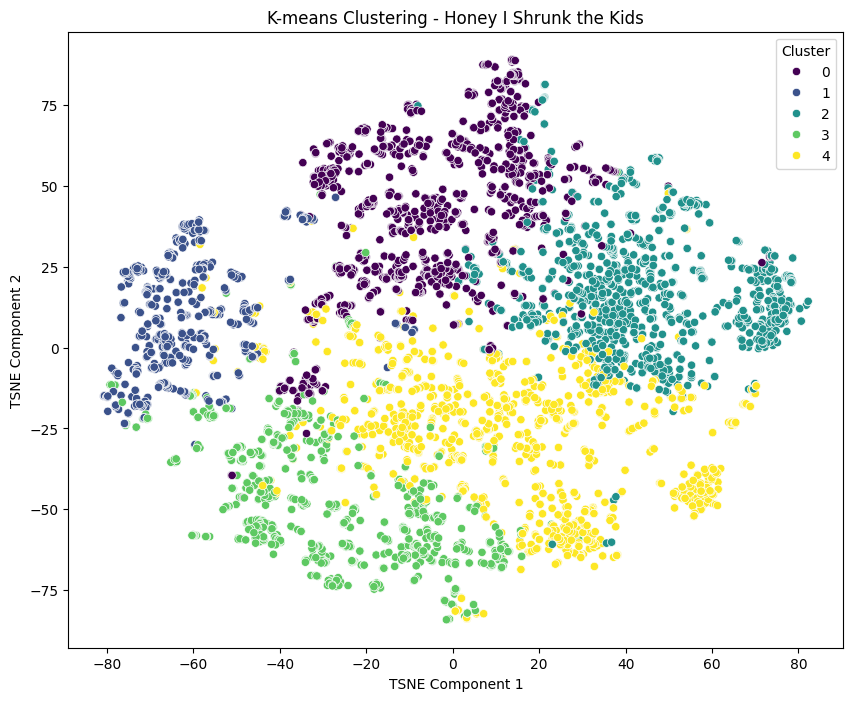

Cluster 0:
Embedding Index: 293


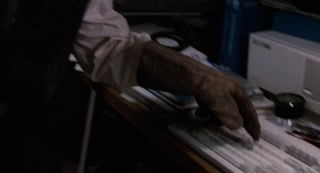

Embedding Index: 2419


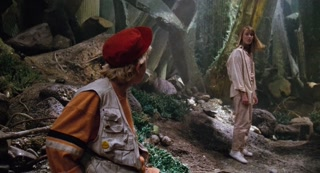

Embedding Index: 3117


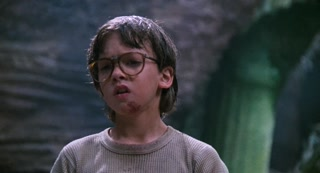

Cluster 1:
Embedding Index: 939


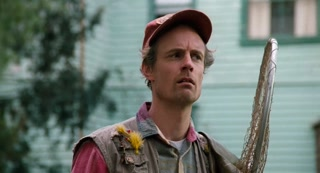

Embedding Index: 5084


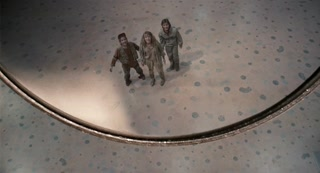

Embedding Index: 2044


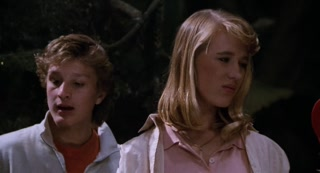

Cluster 2:
Embedding Index: 2279


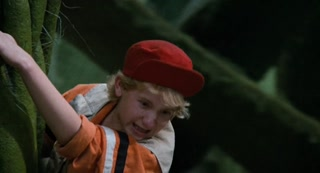

Embedding Index: 4611


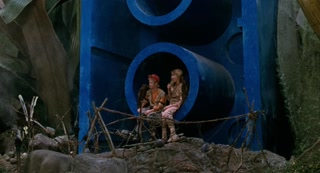

Embedding Index: 2616


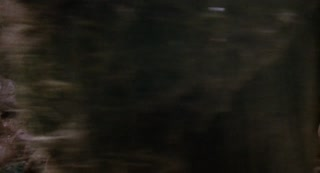

Cluster 3:
Embedding Index: 1767


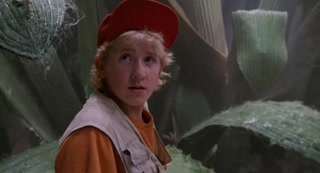

Embedding Index: 3863


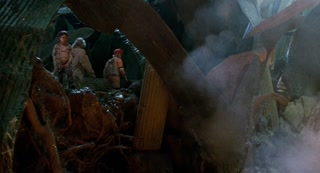

Embedding Index: 5028


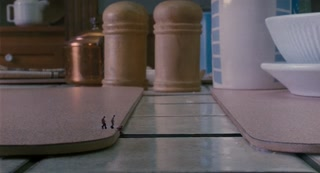

Cluster 4:
Embedding Index: 2087


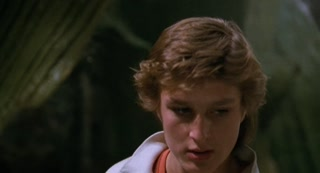

Embedding Index: 4968


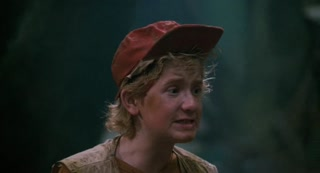

Embedding Index: 764


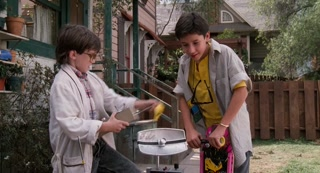

In [5]:
#Visualizing clusters by providing scatter plot to show spatial closeness of images and also outputting an image to provide a visual representation of the cluster. 

# Load movie embeddings from JSON file
movie_embeddings = json.load(open("honey_i_shrunk_the_kids_movie_embeddings_1_second.json"))

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('K-means Clustering - Honey I Shrunk the Kids')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()

for cluster_num in range(5): 
    print(f"Cluster {cluster_num}:")
    cluster_indices = np.where(clusters == cluster_num)[0]
    sample_indices = np.random.choice(cluster_indices, min(3, len(cluster_indices)), replace=False)
    for sample_index in sample_indices:
        print(f"Embedding Index: {sample_index}")
        # Check if 'input' is available
        if 'input' in movie_embeddings[sample_index]:
            image_path = image_root+movie_embeddings[sample_index]['input']
            if image_path:
                display(Image(filename=image_path))
            else:
                print("Thumbnail not available.")
        else:
            print("Thumbnail information not found.")
        
#         # Check if 'scene_description' is available
#         #if 'scene_description' in movie_embeddings[sample_index]:
#             print("Additional Scene Information:")
#             print(movie_embeddings[sample_index]['scene_description'])
#         else:
#             print("Scene description not available.")
#         print("-----------------------------")



Establishing Themes based on Manual Inspection:
Chunk 1:


/Users/kyleshannon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


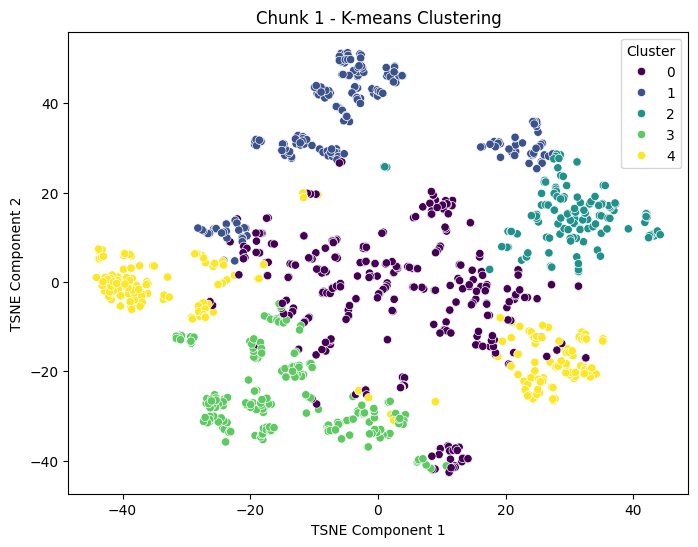

Silhouette Score for Chunk 1: 0.09101480156617539
Visualizing Clusters and Displaying Sample Images:
Theme for Cluster 0: Opening Scenes.


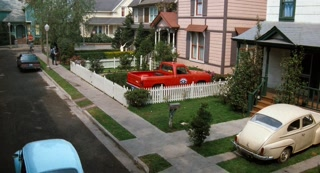

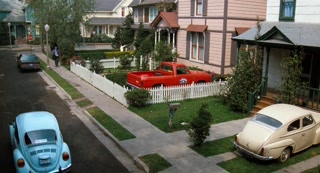

Theme for Cluster 1: Opening Scenes.


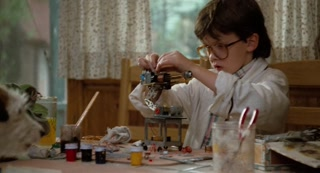

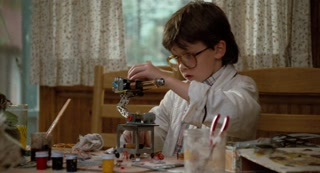

Theme for Cluster 2: Opening Scenes.


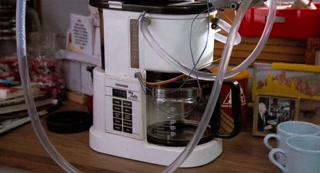

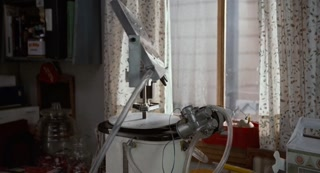

Theme for Cluster 3: Opening Scenes.


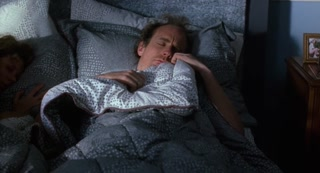

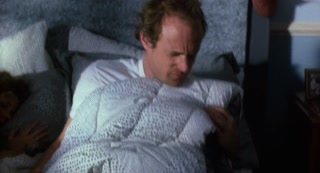

Theme for Cluster 4: Opening Scenes.


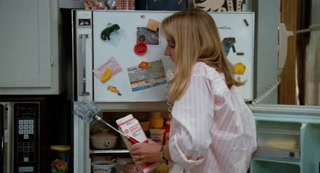

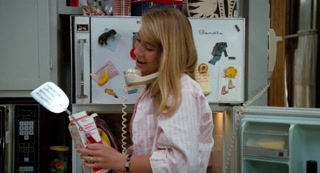

Chunk 2:


/Users/kyleshannon/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


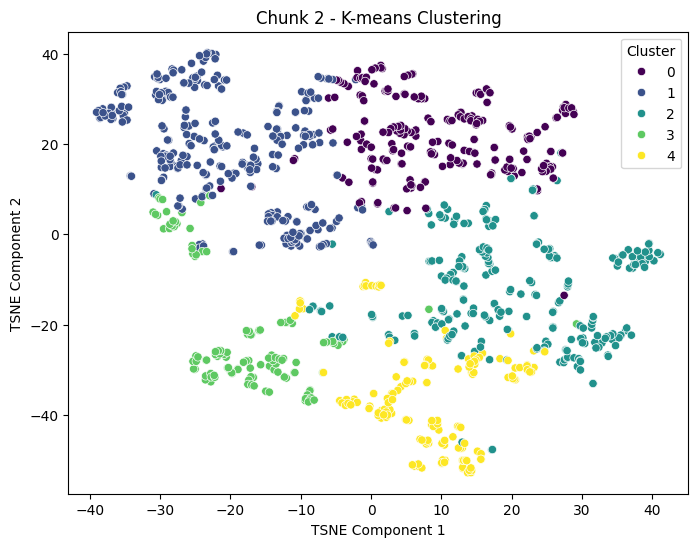

Silhouette Score for Chunk 2: 0.0835539419393688
Visualizing Clusters and Displaying Sample Images:
Theme for Cluster 0: Dad creating ray gun.


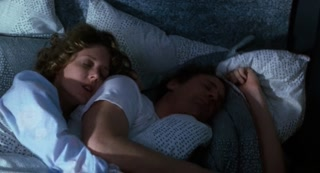

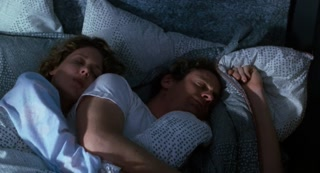

Theme for Cluster 1: Dad creating ray gun.


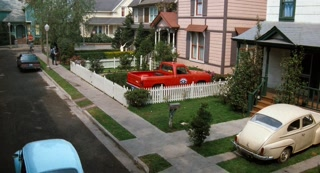

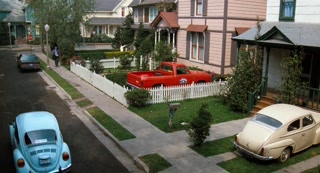

Theme for Cluster 2: Dad creating ray gun.


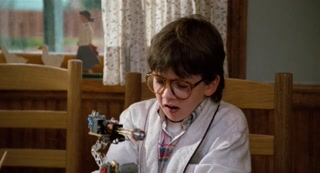

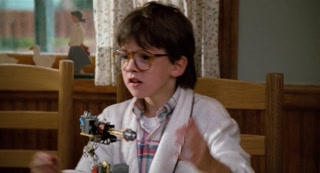

Theme for Cluster 3: Dad creating ray gun.


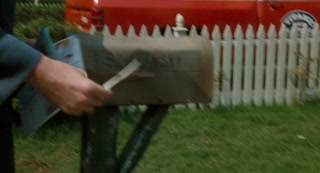

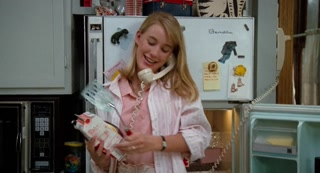

Theme for Cluster 4: Dad creating ray gun.


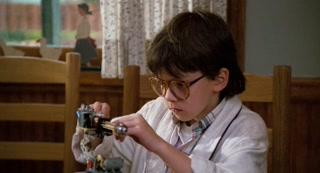

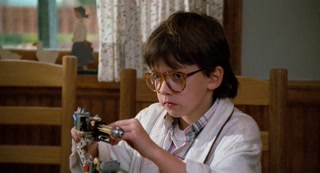

Chunk 3:


In [ ]:
#Attempting to provide them analysis by separating clusters into chunks and then displaying visual representations of those chunks to establish themes.
#Themes were def manually in a function and then assigned within the code based on image analysis. 

# Extract embeddings and convert to numpy array
embeddings = np.array([vector['embedding'] for vector in movie_embeddings[163:5386]])

# Define the number of chunks for clustering
num_chunks = 5

# Split embeddings into chunks
chunk_embeddings = np.array_split(embeddings, num_chunks)

def manually_add_themes(clusters):
    themes = {
        0: "Opening Scenes.",
        1: "Dad creating ray gun.",
        2: "Shrinking the kids.",
        3: "Kids navigating the obstacles while being shrunk.",
        4: "Parents figuring out how to make kids normal sized again."
    }
    return [themes[cluster] for cluster in clusters]

# Define a function to perform clustering, visualize the results, and establish themes
def cluster_and_establish_themes(embeddings, chunk_size):
    # Establish themes for the entire dataset
    print("Establishing Themes based on Manual Inspection:")
    #themes = [""] * 5
    
    for i, chunk in enumerate(embeddings):
        print(f"Chunk {i+1}:")
        
        # Perform t-SNE dimensionality reduction
        tsne = TSNE(n_components=2, random_state=42)
        embeddings_2d = tsne.fit_transform(chunk)
        
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=5, random_state=42)
        clusters = kmeans.fit_predict(chunk)
        
        themes = manually_add_themes(clusters)
        
        # Visualize clusters
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=clusters, palette='viridis', legend='full')
        plt.title(f'Chunk {i+1} - K-means Clustering')
        plt.xlabel('TSNE Component 1')
        plt.ylabel('TSNE Component 2')
        plt.legend(title='Cluster')
        plt.show()
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(chunk, clusters)
        print(f"Silhouette Score for Chunk {i+1}: {silhouette_avg}")
        
        # Visualize clusters and display sample images
        print("Visualizing Clusters and Displaying Sample Images:")
        for j in range(5):
            cluster_indices = np.where(clusters == j)[0]  # Get indices of embeddings belonging to cluster j
            cluster_embeddings = chunk[cluster_indices]
            print(f"Theme for Cluster {j}: {themes[j]}")
            # Display a couple of images specific to the current cluster
            for index in cluster_indices[:2]:
                image_path = image_root + movie_embeddings[163 + index]['input']  # Corrected index
                if image_path:
                    display(Image(filename=image_path))
                else:
                    print("Thumbnail not available.")

        
# Perform clustering, visualization, and theme establishment for each chunk
cluster_and_establish_themes(chunk_embeddings, num_chunks)



### 4. Try to find ideal numbers of clusters

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(embeddings)

print("1.K-Means Clustering\n")
sil_score=[]
maxInd = 0
for i in range(2,5000):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(embedded_vectors)
    kmeans_labels = kmeans.labels_
    
    sil_score.append(silhouette_score(embedded_vectors, kmeans_labels, metric = 'euclidean'))
    if i !=2:
        if sil_score[i-2] >= sil_score[maxInd]:
            maxInd = i-2
    

plt.plot(range(2,5000),sil_score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

print(maxInd)
print(sil_score[maxInd])

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
warnings.filterwarnings('ignore')
mx_ind_list = []

for k in range(0, No_chunks):
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])

    print("Sil Score for "+str(k))
    sil_score=[]
    maxInd = 0
    for i in range(2,len(chunk_embeddings[k])):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto').fit(chunk_vectors)
        kmeans_labels = kmeans.labels_

        sil_score.append(silhouette_score(chunk_vectors, kmeans_labels, metric = 'euclidean'))
        if i !=2:
            if sil_score[i-2] >= sil_score[maxInd]:
                maxInd = i-2
    mx_ind_list.append(maxInd)


    plt.plot(range(2,len(chunk_embeddings[k])),sil_score)
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.show()

    print(maxInd)
    print(sil_score[maxInd])
print(mx_ind_list)

In [ ]:
# Using t-SNE to embed the vectors into 2D
sorted_indexes = []
clusters = []

for k in range(0, No_chunks):
    tsne = TSNE(n_components=2, random_state=42)
    chunk_vectors = tsne.fit_transform(chunk_embeddings[k])
    sorted_indexes.append(np.argsort(chunk_embeddings[k]))

    # Performing KMeans clustering with k=12
    kmeans = KMeans(n_clusters=mx_ind_list[k], random_state=42)
    clusters.append(kmeans.fit_predict(chunk_vectors))

    # Extracting numbers from file names for labels
    #labels = [re.search(r'\d+', vector['input']).group() for vector in chunk_embeddings[0]]

    # Plotting the embedded vectors with cluster coloring
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=chunk_vectors[:, 0], y=chunk_vectors[:, 1], hue=clusters[k], palette='bright', legend=None, s=100)
    #for i, vec in enumerate(chunk_vectors):
        #plt.text(vec[0] + 0.02, vec[1] + 0.02, labels[i], fontsize=6)  # Adding labels
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE Embedded Vectors with KMeans Clustering (k='+str(mx_ind_list[k])+')')
    #plt.legend(title='Cluster')
    plt.show()

In [ ]:
cluster_indexes = [[] for _ in range(214)]

# Populate lists with indexes
for i, cluster in enumerate(clusters[4]):
    cluster_indexes[cluster].append(i)
    
for i in range(0,214):
    print("cluster",i,len(cluster_indexes[i]))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the state from the previous code

# Create a list of cluster assignments for each vector
for k in range(0, No_chunks):
    cluster_labels = [f'Cluster {cluster + 1}' for cluster in clusters[k]]

    # Plotting the scatter plot
    sns.set()
    plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
    sns.scatterplot(x=np.arange(len(chunk_embeddings[k])), y=cluster_labels, hue=cluster_labels, palette='bright', legend=None, s=100)
    plt.xlabel('Index')
    plt.ylabel('Cluster')
    plt.title('Cluster Assignments of Vectors')
    #plt.legend(title='Cluster')
    plt.show()

In [ ]:
print(chunk_embeddings[0])

In [ ]:
show_list = [1234,5049,786]
for i in cluster_indexes[12]:
    #print(embeddings[i])
    #print(i,sorted_indexes[0][i],chunk_movie_embeddings[0][i]["input"])
    image_path = image_root+chunk_movie_embeddings[4][i]["input"]
    # Display the image
    display(Image(filename=image_path))

# Film Description
<i>This section should cite and briefly describe the film.</i>

"Honey, I Shrunk the Kids," a timeless family adventure released in 1989, follows Wayne Szalinski, an eccentric inventor. Accidentally shrinking his children and their neighbors with his latest invention, a shrinking ray, Wayne's kids must brave their backyard-turned-jungle to regain normal size. Facing giant insects and numerous obstacles, they learn valuable lessons in teamwork, friendship, and family while their oblivious parents remain unaware. With its blend of imaginative effects, humor, and touching moments, the film captivates audiences of all ages, earning its place as a beloved classic.

# Methods Summary
<i>This section should highlight methods you used in your exploratory analysis. You should include at least one clustering technique or develop another way to relate frames to other frames. you should also consider dimensionality reduction. 

# Hunches and Hypotheses
<i>This section should summarize the question that you asked about teh film taht could potentially be answered by exploratory analysis. You should ask at least three questions.</i>

<u>Q1. Do most of the clusters have something to do with the kids?</u>

<u>Q2. That machines/tech is fairly common in the clusters?</u>

<u> Q3. One character appears more than any other</u>

# Results and Interpretations

<i>This section should include a summary of your findings. Describe the extent and results of your goal in answering questions.</i>

# Reflection
<i>Reflect on your process of analysis. What worked well and did not work well? Describe the limitations of the work and describe what you would work on with more time.</i>